## Action Plan
** Build model by LUNA to train Data Bowl 2017**

### LUNA
* **1. Data Preparation and Preprocessing **
* **2. Finetune and Train Model**
* **2b. Data Augmentation parameter tuning**
* **3. Generate and Validate Predictions**

### Data Bowl
* **1. Data Preparation and Preprocessing** 
* **2. Finetune and Train Model**
* **2b. Data Augmentation parameter tuning**
* **3. Generate and Validate Predictions** 
* **4. Submit predictions to Kaggle**

In [1]:
%pwd

'D:\\Dropbox\\Ted 2017\\11A_技術\\[TREND] Data Science and ML\\[Tutorials] Kaggle\\[Competitions] Kaggle Competitions\\2017_Segmentation_Data Bowl 2017\\Code'

In [1]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
CODE_HOME_DIR = current_dir
DATA_HOME_DIR = CODE_HOME_DIR + '/../input/'
print(CODE_HOME_DIR)
print(DATA_HOME_DIR)

/home/ubuntu/kaggle/data-bowl-2017/Code
/home/ubuntu/kaggle/data-bowl-2017/Code/../input/


#### Setup Paths

In [2]:
#%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + 'sample_images/' # + '/'
'''
results_path = path + 'results/'
train_path = path + 'train/'
valid_path = path + 'valid/'
test_path = path + 'test/'
model_path = path + 'models/'
if not os.path.exists(model_path): os.makedirs(model_path)
''' 
batch_size = 64

In [1]:
%matplotlib inline

from importlib import reload
import dataprep_databowl; reload(dataprep_databowl)
from dataprep_databowl import *
import utils_databowl; reload(utils_databowl)
from utils_databowl import *

In [4]:
patients = os.listdir(path)
patients.sort()

### Loading the files and transform into Hounsfield Unit (HU)

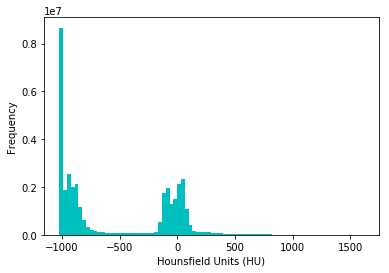

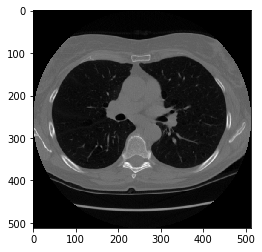

In [5]:
first_patient = load_scan(path + patients[0])
first_patient_pixels = get_pixels_hu(first_patient)
plot_pixels(first_patient_pixels, slice_idx=80)

### Resampling

In [12]:
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)

Shape before resampling	 (134, 512, 512)
Shape after resampling	 (335, 306, 306)


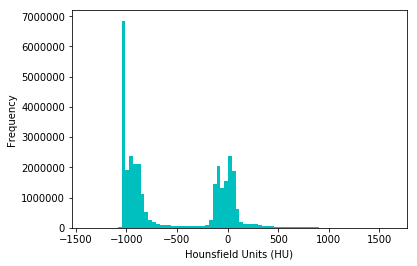

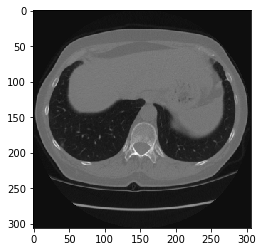

In [15]:
plot_pixels(pix_resampled , slice_idx=80)

### Lung segmentation

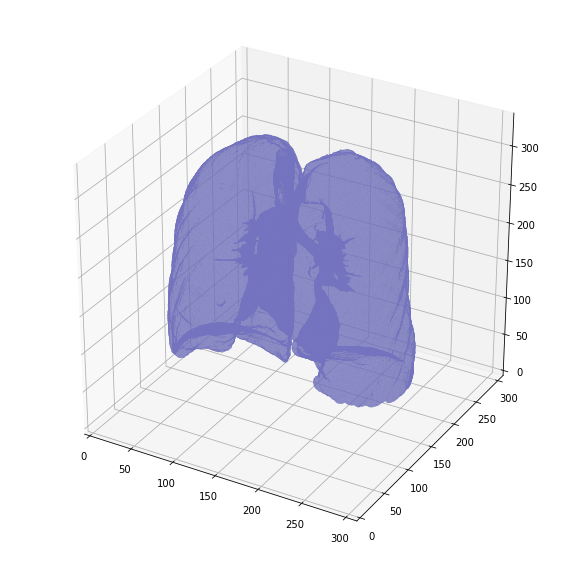

In [16]:
#segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)
plot_3d(segmented_lungs_fill, threshold=0)

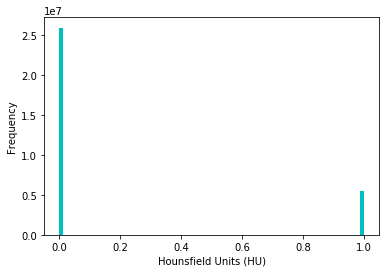

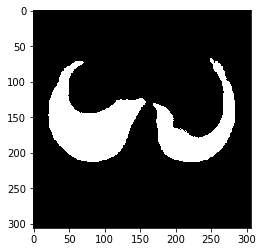

In [18]:
plot_pixels(segmented_lungs_fill, slice_idx=80)

In [23]:
pix_resampled[i].dtype, segmented_lungs_fill[i].dtype

(dtype('int16'), dtype('int8'))

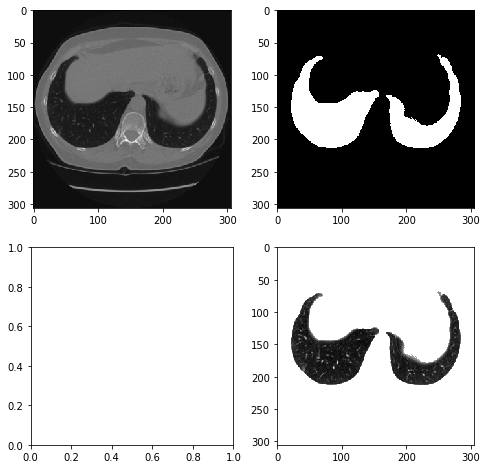

In [20]:
i = 80
fig,ax = plt.subplots(2,2,figsize=[8,8])
ax[0,0].imshow(pix_resampled[i],cmap='gray')
ax[0,1].imshow(segmented_lungs_fill[i],cmap='gray')
#ax[1,0].imshow((matrix2uint16(imgs[i])),cmap='gray')
ax[1,1].imshow(pix_resampled[i]*segmented_lungs_fill[i],cmap='gray')
plt.show()